In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data = pd.read_csv("train.csv")
data = data.sample(frac=1).reset_index(drop=True)
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,687,1,1.3,0,9,1,50,0.6,151,4,...,584,1151,3416,14,6,8,1,1,0,1
1,984,0,0.5,1,3,1,9,0.8,140,3,...,531,707,841,18,15,16,1,0,0,0
2,1659,0,2.8,0,5,0,16,0.6,89,1,...,819,902,3255,19,14,9,0,0,1,1
3,825,0,2.9,1,0,0,34,0.8,99,8,...,1471,1866,2915,8,2,10,1,1,0,1
4,1278,1,1.0,0,7,1,24,0.8,170,3,...,1352,1775,3141,6,2,11,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1853,1,1.0,0,2,0,23,0.4,92,1,...,202,1951,2775,14,4,17,1,0,0,1
1196,1624,1,2.6,1,0,0,58,1.0,200,3,...,1530,1744,1251,13,4,18,0,1,1,0
1197,1054,0,1.1,1,10,1,38,0.4,136,6,...,1097,1222,1675,18,4,14,1,1,1,0
1198,969,0,1.8,1,2,1,44,0.6,158,3,...,167,909,641,9,1,8,1,0,1,0


In [3]:
X = data.drop('price_range', axis=1)
y = data['price_range']


## Decision Tree

### Decision Tree Train

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score



param = {'criterion':['gini', 'entropy'], 'max_depth':range(1, 5, 1), 'min_samples_leaf':range(1, 26, 5)}
clf = GridSearchCV(DecisionTreeClassifier(), param, cv=5, scoring='accuracy', n_jobs=-1, verbose=10)
clf.fit(X, y)

clf.best_params_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 6}

In [5]:
dt_clf = DecisionTreeClassifier(criterion=clf.best_params_['criterion'], max_depth=clf.best_params_['max_depth'], min_samples_leaf=clf.best_params_['min_samples_leaf'])
dt_clf.fit(X, y)


DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=6)

### Decision Tree Test

In [6]:
test = pd.read_csv("test.csv")
test_data = test.drop('price_range', axis=1)
test_ans = pd.DataFrame(test['price_range'])

dt_test_pred = dt_clf.predict(test_data)
print("Accuracy:", accuracy_score(test_ans, dt_test_pred))
 

Accuracy: 0.94


Text(33.22222222222222, 0.5, 'Truth')

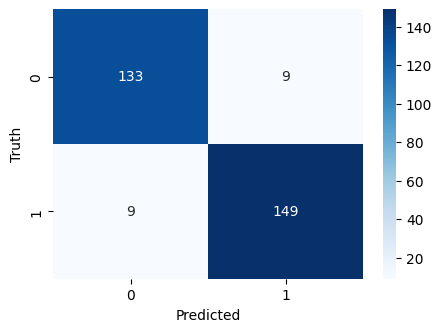

In [7]:
confusion_matrix(test_ans, dt_test_pred)
plt.figure(figsize=(5, 3.5))
sns.heatmap(confusion_matrix(test_ans, dt_test_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## SVM

### SVM Train

In [8]:
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV


param = {'C':[0.1, 1, 10, 100, 1000], 'gamma':[1, 0.1, 0.01, 0.001, 0.0001], 'kernel':['rbf', 'linear']}
clf = GridSearchCV(SVC(), param, cv=5, scoring='accuracy', n_jobs=-1, verbose=10)
clf.fit(X, y)

clf.best_params_


Fitting 5 folds for each of 50 candidates, totalling 250 fits


{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [9]:
SVM_clf = SVC(C=clf.best_params_['C'], gamma=clf.best_params_['gamma'], kernel=clf.best_params_['kernel'])
SVM_clf.fit(X, y)


SVC(C=0.1, gamma=1, kernel='linear')

### SVM Test

In [10]:
test = pd.read_csv("test.csv")
test_data = test.drop('price_range', axis=1)
test_ans = pd.DataFrame(test['price_range'])

svm_test_pred = SVM_clf.predict(test_data)
print("Accuracy:", accuracy_score(test_ans, svm_test_pred))


Accuracy: 0.99


Text(33.22222222222222, 0.5, 'Truth')

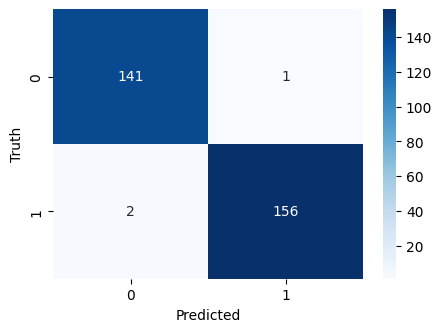

In [11]:
confusion_matrix(test_ans, svm_test_pred)
plt.figure(figsize=(5, 3.5))
sns.heatmap(confusion_matrix(test_ans, svm_test_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [12]:
print("Accuracy:", accuracy_score(test_ans, dt_test_pred))
print("Accuracy:", accuracy_score(test_ans, svm_test_pred))


Accuracy: 0.94
Accuracy: 0.99
